In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Data Profiling and Cleansing

In [ ]:
air_bnb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb NYC 2019.csv')
air_bnb_df.isnull().sum()
#dropping the unnecessary columns 
air_bnb_df.drop(['last_review'], axis=1, inplace=True)
#replacing all null values in reviews_per_month with 0
air_bnb_df.reviews_per_month.fillna(0, inplace=True)
print(air_bnb_df.isnull().any())






id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


#Q1-What can we learn about different hosts and areas?


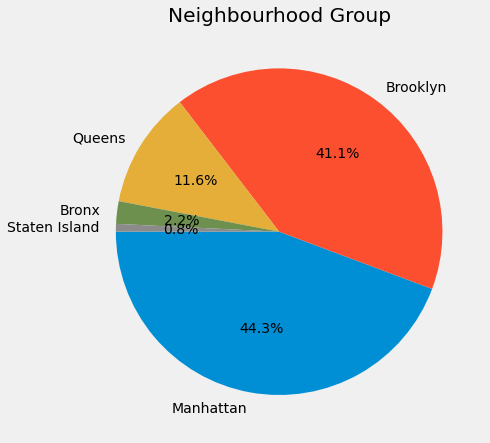

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(air_bnb_df.neighbourhood_group.value_counts(), labels=air_bnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()


Ans-The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group

#Q2-What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
Reviews_of_areas = air_bnb_df.groupby(['name','neighbourhood_group','price','minimum_nights','room_type'])['number_of_reviews'].count().reset_index()
Reviews_of_price = Reviews_of_areas.sort_values(by='price',ascending=False).head(200)
Reviews_of_price

,name,neighbourhood_group,price,minimum_nights,room_type,number_of_reviews
1112,1-BR Lincoln Center,Manhattan,10000,30,Entire home/apt,1
20220,Furnished room in Astoria apartment,Queens,10000,100,Private room,1
27225,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,Entire home/apt,1
41048,Spanish Harlem Apt,Manhattan,9999,5,Entire home/apt,1
36155,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,Private room,1
...,...,...,...,...,...,...
37458,"SPACIOUS Floor-Through Loft in Flatiron, NYC",Manhattan,1200,2,Entire home/apt,1
4208,Apartment at the St.Regis Hotel,Manhattan,1200,1,Entire home/apt,1
2601,"4BD, 2 Bath Apt Flatiron on 6th Ave",Manhattan,1200,1,Entire home/apt,1
28083,Magnificent Townhouse - Upper East Side - NYC,Manhattan,1200,5,Entire home/apt,1


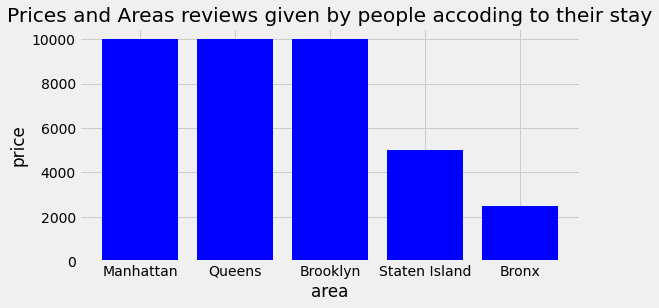

In [ ]:
area = Reviews_of_price['neighbourhood_group']
price = Reviews_of_price['price']




figure_size = plt.figure(figsize = (8,4))

plt.bar(area , price, color = 'Blue',width = 0.8)

plt.xlabel('area')
plt.ylabel('price')
plt.title('Prices and Areas reviews given by people accoding to their stay')
plt.show()

Ans-As shown as result in DataFrame that most of the people prefers to stay at the places where prices are low and most of them have taken Entire home/apt. But in "Queens" minimum number nights were stayed by people it means here people stays a bit longer most of them have taken private room.

#Q3-Which hosts are the busiest and why?

In [ ]:
busiest_hosts = air_bnb_df.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busiest_hosts = busiest_hosts.sort_values(by= 'minimum_nights',ascending=False).head()
busiest_hosts

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117


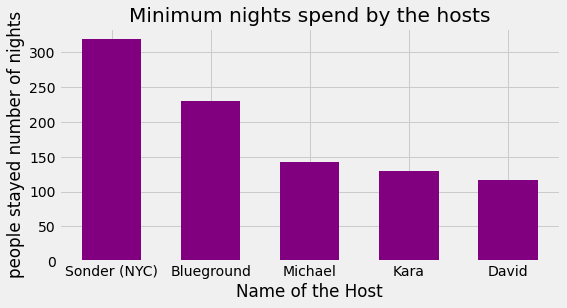

In [ ]:
name = busiest_hosts['host_name']
stays = busiest_hosts['minimum_nights']
figure_size = plt.figure(figsize = (8,4))
plt.bar(name, stays, color = 'purple', width = 0.6)
plt.xlabel('Name of the Host')
plt.ylabel('people stayed number of nights')
plt.title('Minimum nights spend by the hosts')
plt.show()

Answer:- Most Busiest host among all is Sonder (NYC) after him Blueground, Michael, Kara, David and soo on...

Host is busy bcs maintaing there place ass you can see Manhattan is the most popular place and there Entire home/apt is prefered by most of the people.

#Q4-Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_among_different_areas = air_bnb_df.groupby(['neighbourhood_group','price','room_type'])['minimum_nights'].count().reset_index()
traffic_among_different_areas = traffic_among_different_areas.sort_values(by='minimum_nights',ascending=False).head(500) # by ".T" we can do Tanspose
traffic_among_different_areas

,neighbourhood_group,price,room_type,minimum_nights
1201,Manhattan,150,Entire home/apt,783
309,Brooklyn,50,Private room,774
1300,Manhattan,200,Entire home/apt,712
332,Brooklyn,60,Private room,708
525,Brooklyn,150,Entire home/apt,681
...,...,...,...,...
605,Brooklyn,198,Entire home/apt,15
1507,Manhattan,339,Entire home/apt,15
1515,Manhattan,345,Entire home/apt,15
1568,Manhattan,390,Entire home/apt,15


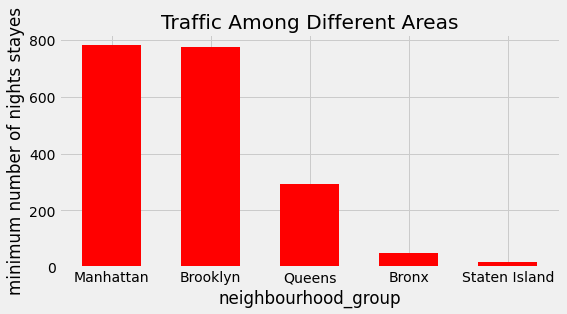

In [ ]:
Rooms = traffic_among_different_areas['neighbourhood_group']
stayed_minimum_nights = traffic_among_different_areas['minimum_nights']
figure_size= plt.figure(figsize = (8,4))
plt.bar(Rooms, stayed_minimum_nights, color = 'Red',width=0.6)
plt.xlabel('neighbourhood_group')
plt.ylabel('minimum number of nights stayes')
plt.title('Traffic Among Different Areas')
plt.show()

Answer:- In Table you can see that most of the people are prefering to stay Entire Home/apartment and they in Famous Manhattan and very few people are staying in private room bcz of there less price in Brooklyn and queens and rest of the stays in shared room.

#Q5-Neighbourhood Group vs. Availability Room

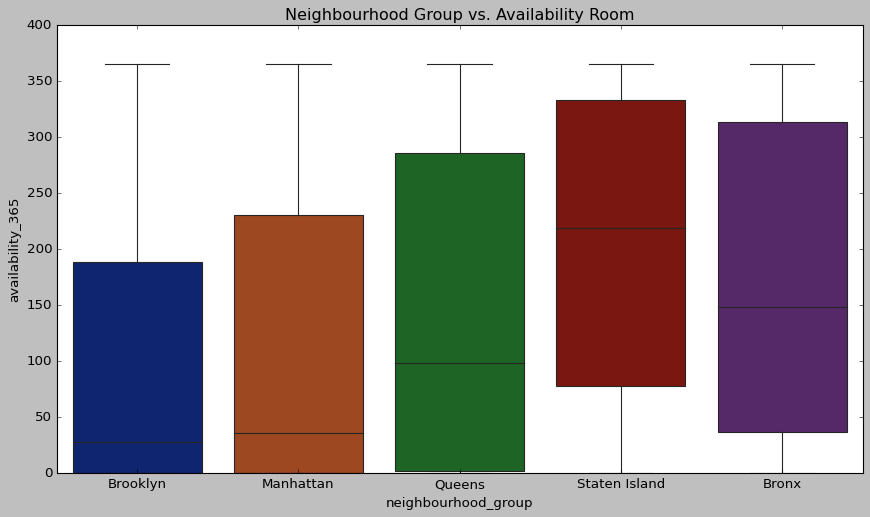

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=air_bnb_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

Ans-As shown in boxplot graph that in Brooklyn most of the properties are available between 0 to 200 little bit of number increased by manhattan and most diverse room availaibilitiy is of Queens


#Q6Types of properties listed

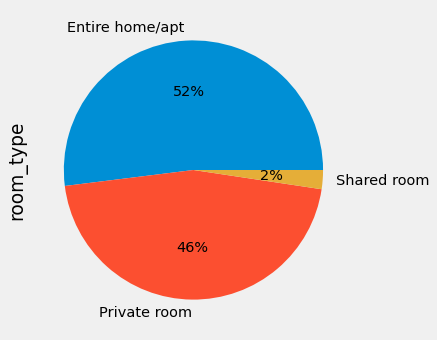

In [ ]:
air_bnb_df['room_type'].unique()
air_bnb_df['room_type'].value_counts()
fig = plt.figure(figsize=(5,5), dpi=80)
air_bnb_df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

Most famous types of properties are Entire/apt and private room and shared rooms are very less as most of the people don't like to share their personal space.

#Q7-Map of Neighbourhood group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


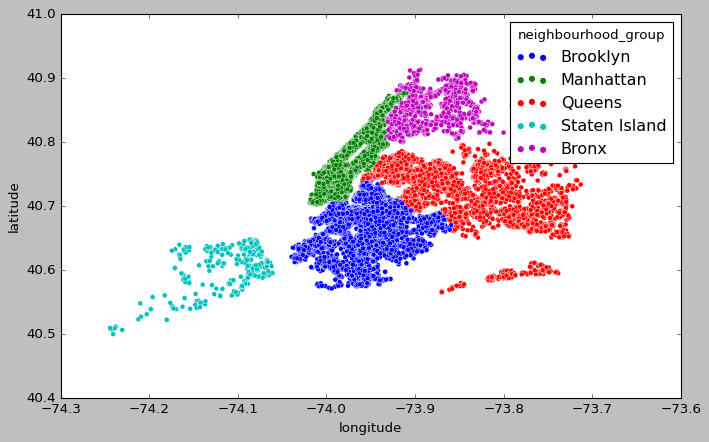

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(air_bnb_df.longitude,air_bnb_df.latitude,hue=air_bnb_df.neighbourhood_group)
plt.ioff()

Ans-As shown in the graph the closeby areas i.e brooklyn,manhatten,queens are the most popular. 

#Q8-Price distribution in different types of rooms

Private rooms on average are priced from 60-120 dollars per night on an average depending upon the neighbourhood group it is located.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


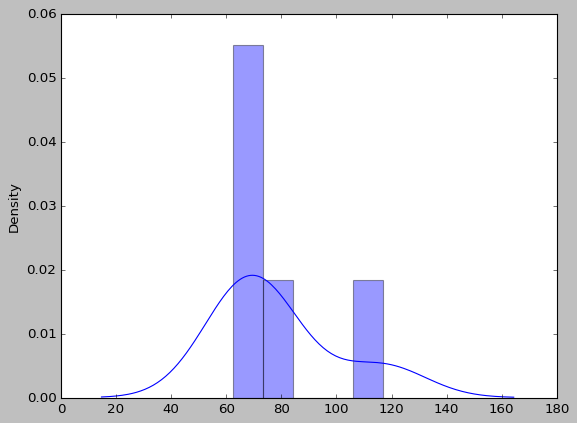

In [ ]:
df1 = air_bnb_df[air_bnb_df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

#Price Distribution of Shared rooms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


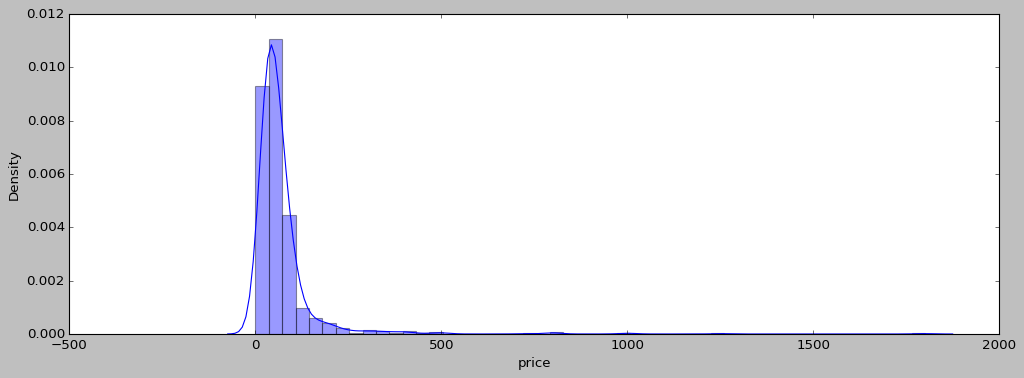

In [ ]:
df1 = air_bnb_df[air_bnb_df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Most of the shared rooms have the price range between 50-70 dollars per night depending upon the neighbourhood groups.

#Price Distribution of Entire home/apt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


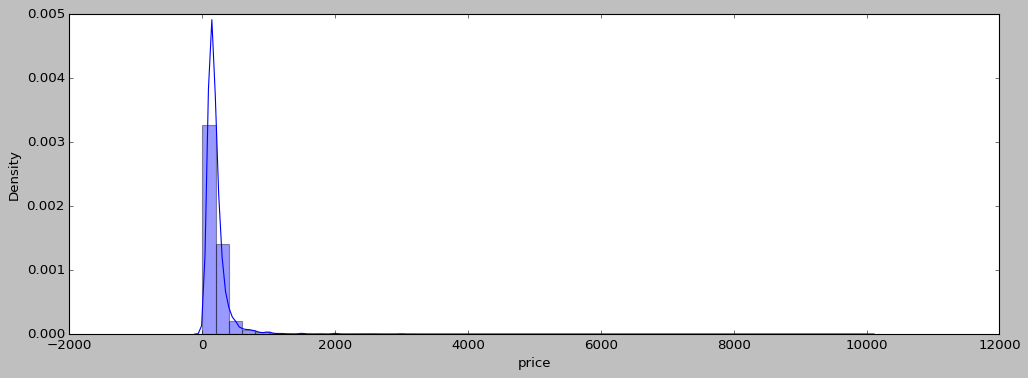

In [ ]:
df1 = air_bnb_df[air_bnb_df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Most of the Entire home/apt are priced between 0  to 1000.